# ErSE 394 — Geo-Environmental Modeling & Analysis
## Assignment Block 2 (Global Climate Change Assessment)

### Link to the repository: [https://github.com/Sara-Iftikhar/geo_env](https://github.com/Sara-Iftikhar/geo_env)

### Exercise 03

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset

In [2]:
dset = Dataset(os.path.join(os.getcwd(), 'data', 'Climate_Model_Data', 'tas_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_195001-201412.nc'))
dset.variables

{'bnds': <class 'netCDF4._netCDF4.Variable'>
 float64 bnds(bnds)
     long_name: vertex number
 unlimited dimensions: 
 current shape = (2,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'height': <class 'netCDF4._netCDF4.Variable'>
 float64 height()
     long_name: height
     units: m
     missing_value: 1e+20
     _FillValue: 1e+20
     cell_methods: time: point
     axis: Z
     positive: up
     standard_name: height
     description: ~2 m standard surface air temperature and surface humidity  height
 unlimited dimensions: 
 current shape = ()
 filling on,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float64 lat(lat)
     long_name: latitude
     units: degrees_north
     axis: Y
     bounds: lat_bnds
     standard_name: latitude
     cell_methods: time: point
 unlimited dimensions: 
 current shape = (180,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lat_bnds': <class 'netCDF4._netCDF4.Variable'>
 float64 lat_bnds(lat, bnds)
     long_name: l

#### Question 05 (Which variables does the netCDF contain?)
It contains nine variables which are listed below

In [3]:
dset.variables.keys()

dict_keys(['bnds', 'height', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'tas', 'time', 'time_bnds'])

#### Question 06 (What are the dimensions of the air temperature variable?)

In [4]:
dset.variables['tas']

<class 'netCDF4._netCDF4.Variable'>
float32 tas(time, lat, lon)
    long_name: Near-Surface Air Temperature
    units: K
    missing_value: 1e+20
    _FillValue: 1e+20
    cell_methods: area: time: mean
    cell_measures: area: areacella
    coordinates: height
    standard_name: air_temperature
    interp_method: conserve_order2
    original_name: tas
unlimited dimensions: time
current shape = (780, 180, 288)
filling on

It has a dimension of (780, 180, 288) which represents (time, lat, lon)

In [5]:
dset.variables['tas'].shape

(780, 180, 288)

#### Question 07 (What kind of data is this: raster, vector, or point?)

Since, air temperature data is a three dimensional data, so it is a raster data

#### Question 08 (What is the data type of the air temperature variables: integer, single, or double?)
data type of the air temperature variable is `Float32`

In [6]:
dset.variables['tas'].dtype

dtype('float32')

#### Question 09 (Is this the optimal data type for air temperature data?)

Yes, as temperature should be in decimals to have good precision and accuracy.

#### Question 10 (What is the time span of each netCDF file?)

The time span for each netCDF file is given below,

![Local Image](E:\AA\HYXE_consultancy\geo_env\figures\time_span.png)   |

#### Question 11 (What is the spatial resolution of the air temperature data?)

The spatial resolution in terms of latitude will be 180°/180 = 1°. In terms of longitude it will be 360°/288 = 1.25°. So the spatial resolution of air temperature data will be (1° by 1.25°)

#### Question 12 (What is the temporal resolution of the air temperature data?)

The temporal resolution of the air temperature data 1 day

#### Question 13 (What is the spatial projection of the air temperature data?)
The spatial projection of the air temperature data is geographic coordinate system as it uses latitude and longitude values to define locations.


#### Question 14 (What are the units of the air temperature data?)
The unit of the air temperature data is Kelvin (K).

#### Question 15 (What is the meaning of ssp in the file names?)
It stands for ‘Shared Socioeconomic Pathways’ which are climate change scenarios of projected socioeconomic global changes.

#### Question 16 (What type of model does the data originate from: physically-based, conceptual, data-driven, or hybrid?)
Since the experiment attribute is 'all-forcing simulation of the recent past,' and the experiment_id is 'historical', 
so its more likely a physically-based model. 

In [7]:
print(dset.experiment)
print(dset.experiment_id)

all-forcing simulation of the recent past
historical


In [8]:
dset.close()

#### Question 17 (Calculate the mean air temperature map for 1850–1900 (also known as the pre-industrial period).)

In [9]:
fpath = os.path.join(os.getcwd(), 'data', 'Climate_Model_Data', 'tas_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_185001-194912.nc')
dset_1850 = xr.open_dataset(fpath)
tas_maps = dset_1850['tas'].sel(time=slice('18500116', '19001231')).mean(axis=0)
tas_maps

<xarray.DataArray 'tas' (lat: 180, lon: 288)>
array([[222.56255, 222.53215, 222.50182, ..., 222.65363, 222.62318,
        222.5928 ],
       [223.68375, 223.61707, 223.55048, ..., 223.88269, 223.81651,
        223.75012],
       [224.90875, 224.80443, 224.7002 , ..., 225.22083, 225.11693,
        225.01271],
       ...,
       [255.17082, 255.19255, 255.21426, ..., 255.10442, 255.1266 ,
        255.14867],
       [254.9645 , 254.975  , 254.9857 , ..., 254.93196, 254.94293,
        254.95355],
       [254.75653, 254.75888, 254.761  , ..., 254.75005, 254.7522 ,
        254.75462]], dtype=float32)
Coordinates:
    height   float64 ...
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4

#### Question 18 (Calculate mean air temperature maps for 2071–2100 for each climate scenario using the np.mean function)

In [10]:
# defining paths to the dataset for each scenario
fp_ssp119 = (os.path.join(os.getcwd(), 'data', 'Climate_Model_Data', 'tas_Amon_GFDL-ESM4_ssp119_r1i1p1f1_gr1_201501-210012.nc'))
fp_ssp245 = (os.path.join(os.getcwd(), 'data', 'Climate_Model_Data', 'tas_Amon_GFDL-ESM4_ssp245_r1i1p1f1_gr1_201501-210012.nc'))
fp_ssp585 = (os.path.join(os.getcwd(), 'data', 'Climate_Model_Data', 'tas_Amon_GFDL-ESM4_ssp585_r1i1p1f1_gr1_201501-210012.nc'))

# opening dataset for each scenario
dset_ssp119 = xr.open_dataset(fp_ssp119)
dset_ssp245 = xr.open_dataset(fp_ssp245)
dset_ssp585 = xr.open_dataset(fp_ssp585)

# the mean air temperature map for SSP119 scenario is given below
mean_tas_ssp119 = np.mean(dset_ssp119['tas'].sel(time=slice('20710101', '21001231')), axis=0)
# the mean air temperature map for SSP245 scenario is given below
mean_tas_ssp245 = np.mean(dset_ssp245['tas'].sel(time=slice('20710101', '21001231')), axis=0)
# the mean air temperature map for SSP585 scenario is given below
mean_tas_ssp585 = np.mean(dset_ssp585['tas'].sel(time=slice('20710101', '21001231')), axis=0)

print(f'the mean air temperature map for SSP119 scenario is: {mean_tas_ssp119}')
print(f'the mean air temperature map for SSP245 scenario is: {mean_tas_ssp245}')
print(f'the mean air temperature map for SSP585 scenario is: {mean_tas_ssp585}')

the mean air temperature map for SSP119 scenario is: <xarray.DataArray 'tas' (lat: 180, lon: 288)>
array([[224.61356, 224.58429, 224.55519, ..., 224.70096, 224.67172,
        224.64258],
       [225.678  , 225.61368, 225.5491 , ..., 225.87038, 225.80655,
        225.74239],
       [226.91885, 226.81645, 226.71411, ..., 227.22589, 227.12357,
        227.02116],
       ...,
       [257.33755, 257.35898, 257.38043, ..., 257.27277, 257.2945 ,
        257.316  ],
       [257.1081 , 257.11777, 257.1276 , ..., 257.0783 , 257.08832,
        257.09836],
       [256.8859 , 256.8869 , 256.88776, ..., 256.88306, 256.88394,
        256.88492]], dtype=float32)
Coordinates:
    height   float64 ...
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
the mean air temperature map for SSP245 scenario is: <xarray.DataArray 'tas' (lat: 180, lon: 288)>
array([[226.35338, 226.324  , 226.29442, ..., 22

In [11]:
path = os.path.join(os.getcwd(), 'figures')
if not os.path.exists(path):
      os.mkdir(path)

#### Question 19 (Compute and visualize the temperature differences between 2071–2100 and 1850–1900 for each scenario. Use libraries like matplotlib for creating the visualizations. Ensure your visualizations are of high quality and saved as PNG using, for example, plt.savefig(’filename.png’, dpi=300). Ensure your plots include clear legends, color bars, titles, and axis labels)

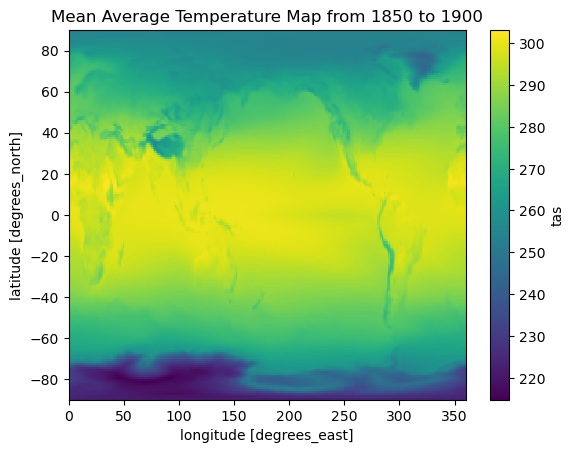

In [12]:
dset_1850['tas'].sel(time=slice('18500116', '19001231')).mean(axis=0).plot()
ax = plt.gca()
ax.set_title('Mean Average Temperature Map from 1850 to 1900')
plt.savefig(os.path.join(path, 'mean_tas_1850_1900'), dpi=300)
plt.show()

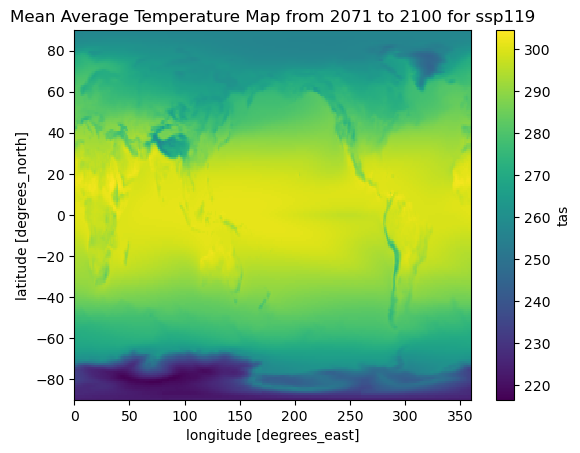

In [13]:
dset_ssp119['tas'].sel(time=slice('20710101', '21001231')).mean(axis=0).plot()
ax = plt.gca()
ax.set_title('Mean Average Temperature Map from 2071 to 2100 for ssp119')
plt.savefig(os.path.join(path, 'mean_tas_2071_2100_ssp119'), dpi=300)
plt.show()

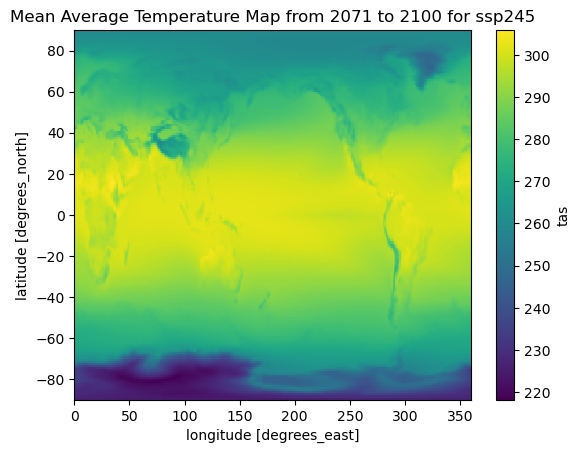

In [14]:
dset_ssp245['tas'].sel(time=slice('20710101', '21001231')).mean(axis=0).plot()
ax = plt.gca()
ax.set_title('Mean Average Temperature Map from 2071 to 2100 for ssp245')
plt.savefig(os.path.join(path, 'mean_tas_2071_2100_ssp245'), dpi=300)
plt.show()

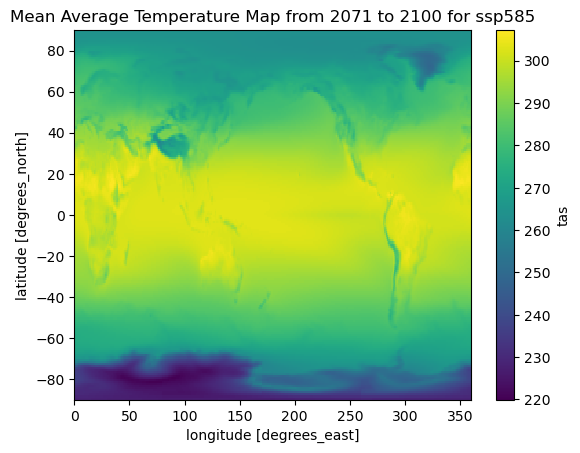

In [15]:
dset_ssp585['tas'].sel(time=slice('20710101', '21001231')).mean(axis=0).plot()
ax = plt.gca()
ax.set_title('Mean Average Temperature Map from 2071 to 2100 for ssp585')
plt.savefig(os.path.join(path, 'mean_tas_2071_2100_ssp585'), dpi=300)
plt.show()

### Exercise 04

#### Question 01 (To analyze climate data for your city, find its latitude and longitude, then convert these to x,y indices based on the climate model’s grid system.)

Latitude and Longitude of my city `Islamabad` are 33.738045 and 73.084488 respectively.

In [16]:
islamabad_lat = 33.738045
islamabad_lon = 73.084488

# Find nearest grid points in the model dataset for 1850
nearest_lat_index = abs(dset_1850['lat'] - islamabad_lat).argmin().item()
nearest_lon_index = abs(dset_1850['lon'] - islamabad_lon).argmin().item()

#### Question 02 (Extract the air temperature time series data for your city from the five netCDF files.)

In [17]:
# Extract data at Islamabad's location
climate_data_at_islamabad_1850 = dset_1850['tas'].isel(lat=nearest_lat_index, lon=nearest_lon_index)

In [19]:
fp_1950 = (os.path.join(os.getcwd(), 'data', 'Climate_Model_Data', 'tas_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_195001-201412.nc'))

dset_1950 = xr.open_dataset(fp_1950)

nearest_lat_index = abs(dset_1950['lat'] - islamabad_lat).argmin().item()
nearest_lon_index = abs(dset_1950['lon'] - islamabad_lon).argmin().item()

climate_data_at_islamabad_1950 = dset_1950['tas'].isel(lat=nearest_lat_index, lon=nearest_lon_index)

In [20]:
nearest_lat_index = abs(dset_ssp119['lat'] - islamabad_lat).argmin().item()
nearest_lon_index = abs(dset_ssp119['lon'] - islamabad_lon).argmin().item()

climate_data_at_islamabad_ssp119 = dset_ssp119['tas'].isel(lat=nearest_lat_index, lon=nearest_lon_index)

In [21]:
nearest_lat_index = abs(dset_ssp245['lat'] - islamabad_lat).argmin().item()
nearest_lon_index = abs(dset_ssp245['lon'] - islamabad_lon).argmin().item()

climate_data_at_islamabad_ssp245 = dset_ssp245['tas'].isel(lat=nearest_lat_index, lon=nearest_lon_index)

In [22]:
nearest_lat_index = abs(dset_ssp585['lat'] - islamabad_lat).argmin().item()
nearest_lon_index = abs(dset_ssp585['lon'] - islamabad_lon).argmin().item()

climate_data_at_islamabad_ssp585 = dset_ssp585['tas'].isel(lat=nearest_lat_index, lon=nearest_lon_index)

#### Question 03 (What is the mean air temperature change projected for your city in the 2071–2100 period  compared to the pre-industrial period (1850–1900) for each scenario?)

In [23]:
isl_1850 = climate_data_at_islamabad_1850.sel(time=slice('18500116', '19001231')).mean(axis=0).data.item()
isl_ssp119 = climate_data_at_islamabad_ssp119.sel(time=slice('20710101', '21001231')).mean(axis=0).data.item()
isl_ssp245 = climate_data_at_islamabad_ssp245.sel(time=slice('20710101', '21001231')).mean(axis=0).data.item()
isl_ssp585 = climate_data_at_islamabad_ssp585.sel(time=slice('20710101', '21001231')).mean(axis=0).data.item()

print(f'Mean air temperature change projected for Islamabad in the (2071–2100) period compared to the '
      f'pre-industrial period (1850–1900) for SSP119 is {isl_ssp119-isl_1850}')

print(f'Mean air temperature change projected for Islamabad in the (2071–2100) period compared to the '
      f'pre-industrial period (1850–1900) for SSP245 is {isl_ssp245-isl_1850}')

print(f'Mean air temperature change projected for Islamabad in the (2071–2100) period compared to the '
      f'pre-industrial period (1850–1900) for SSP585 is {isl_ssp585-isl_1850}')

Mean air temperature change projected for Islamabad in the (2071–2100) period compared to the pre-industrial period (1850–1900) for SSP119 is 1.25140380859375
Mean air temperature change projected for Islamabad in the (2071–2100) period compared to the pre-industrial period (1850–1900) for SSP245 is 3.13665771484375
Mean air temperature change projected for Islamabad in the (2071–2100) period compared to the pre-industrial period (1850–1900) for SSP585 is 4.939544677734375


#### Question 04 (What is the global average projected temperature change for each scenario?)

In [24]:
global_1850 = dset_1850['tas'].sel(time=slice('18500116', '19001231')).mean().data.item()
global_ssp119 = dset_ssp119['tas'].sel(time=slice('20710101', '21001231')).mean().data.item()
global_ssp245 = dset_ssp245['tas'].sel(time=slice('20710101', '21001231')).mean().data.item()
global_ssp585 = dset_ssp585['tas'].sel(time=slice('20710101', '21001231')).mean().data.item()

print(f'global average projected temperature change in the (2071–2100) period compared to the '
      f'pre-industrial period (1850–1900) for SSP119 is {global_ssp119-global_1850}')

print(f'global average projected temperature change in the (2071–2100) period compared to the '
      f'pre-industrial period (1850–1900) for SSP245 is {global_ssp245-global_1850}')

print(f'global average projected temperature change in the (2071–2100) period compared to the '
      f'pre-industrial period (1850–1900) for SSP585 is {global_ssp585-global_1850}')

global average projected temperature change in the (2071–2100) period compared to the pre-industrial period (1850–1900) for SSP119 is 1.141998291015625
global average projected temperature change in the (2071–2100) period compared to the pre-industrial period (1850–1900) for SSP245 is 2.503021240234375
global average projected temperature change in the (2071–2100) period compared to the pre-industrial period (1850–1900) for SSP585 is 4.02783203125


#### Question 05 (Create air temperature time series plots for 1850–2100. Ensure your plots include clear legends, color bars, titles, and axis labels. Export your figures as high-quality PNG files.)

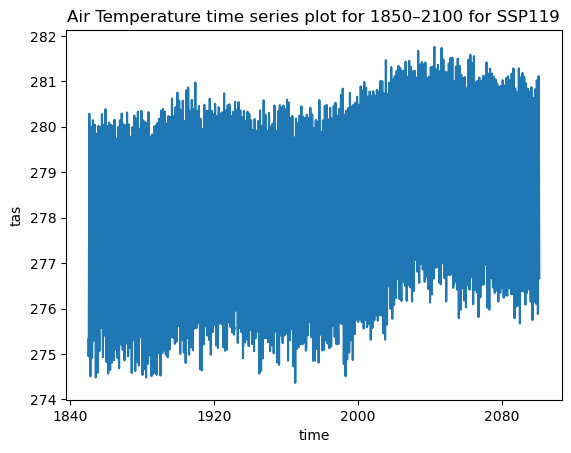

In [25]:
# Firstly, combining the three datasets to get a time series for 1850–2100 for 1st scenario
combined_dset_ssp119 = xr.concat([dset_1850, dset_1950, dset_ssp119], dim='time')

combined_dset_ssp119['tas'].sel(time=slice('18500116', '21001216')).mean(axis=(1,2)).plot()
ax = plt.gca()
ax.set_title('Air Temperature time series plot for 1850–2100 for SSP119')
plt.savefig(os.path.join(path, 'air_temp_time_series_1850-2100_ssp119'), dpi=300)
plt.show()

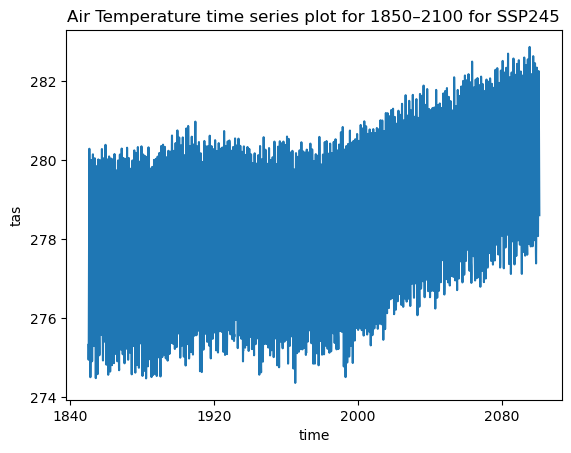

In [26]:
combined_dset_ssp245 = xr.concat([dset_1850, dset_1950, dset_ssp245], dim='time')

combined_dset_ssp245['tas'].sel(time=slice('18500116', '21001216')).mean(axis=(1,2)).plot()
ax = plt.gca()
ax.set_title('Air Temperature time series plot for 1850–2100 for SSP245')
plt.savefig(os.path.join(path, 'air_temp_time_series_1850-2100_ssp245'), dpi=300)
plt.show()

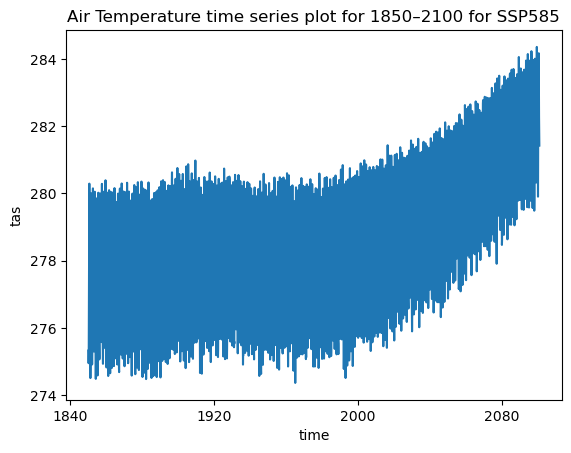

In [27]:
combined_dset_ssp585 = xr.concat([dset_1850, dset_1950, dset_ssp585], dim='time')

combined_dset_ssp585['tas'].sel(time=slice('18500116', '21001216')).mean(axis=(1,2)).plot()
ax = plt.gca()
ax.set_title('Air Temperature time series plot for 1850–2100 for SSP585')
plt.savefig(os.path.join(path, 'air_temp_time_series_1850-2100_ssp585'), dpi=300)
plt.show()

#### Question 09 (What would be a straightforward way to improve the accuracy of the climate change projections?)

One way to improve the accuracy of the climate change projections is to increase the temporal and spatial resolution by using the high-resolution models. 

#### Question 08 (Bonus Challenge: Create plots that compare both the global averages and the temperature changes specific to your city.)

In [28]:
# Find nearest grid points in the model dataset for SSP119
nearest_lat_index = abs(combined_dset_ssp119['lat'] - islamabad_lat).argmin().item()
nearest_lon_index = abs(combined_dset_ssp119['lon'] - islamabad_lon).argmin().item()

# Extract data at Islamabad's location
combined_isl_ssp119 = combined_dset_ssp119['tas'].isel(lat=nearest_lat_index, lon=nearest_lon_index)

# Find nearest grid points in the model dataset for SSP245
nearest_lat_index = abs(combined_dset_ssp245['lat'] - islamabad_lat).argmin().item()
nearest_lon_index = abs(combined_dset_ssp245['lon'] - islamabad_lon).argmin().item()

# Extract data at Islamabad's location
combined_isl_ssp245 = combined_dset_ssp245['tas'].isel(lat=nearest_lat_index, lon=nearest_lon_index)

# Find nearest grid points in the model dataset for SSP585
nearest_lat_index = abs(combined_dset_ssp585['lat'] - islamabad_lat).argmin().item()
nearest_lon_index = abs(combined_dset_ssp585['lon'] - islamabad_lon).argmin().item()

# Extract data at Islamabad's location
combined_isl_ssp585 = combined_dset_ssp585['tas'].isel(lat=nearest_lat_index, lon=nearest_lon_index)

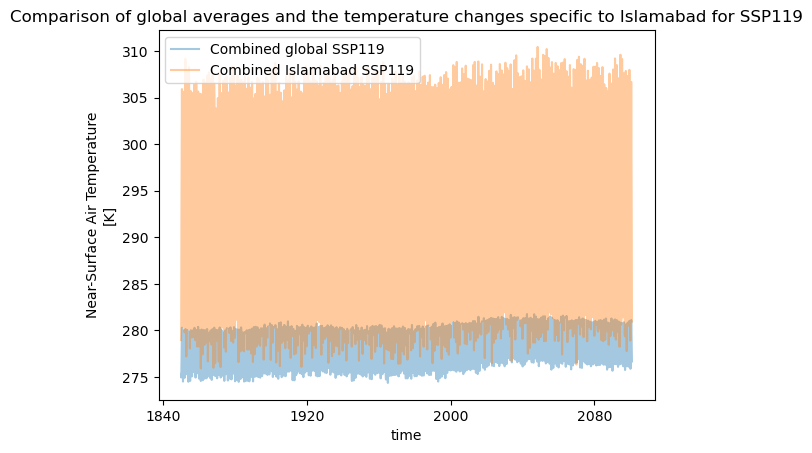

In [29]:
combined_dset_ssp119['tas'].sel(time=slice('18500116', '21001216')).mean(axis=(1,2)).plot(alpha=0.4, label='Combined global SSP119')
combined_isl_ssp119.plot(alpha=0.4, label='Combined Islamabad SSP119')
plt.legend()
ax = plt.gca()
ax.set_title('Comparison of global averages and the temperature changes specific to Islamabad for SSP119')
plt.savefig(os.path.join(path, 'air_temp_time_series_comparison_ssp119'), dpi=300)
plt.show()

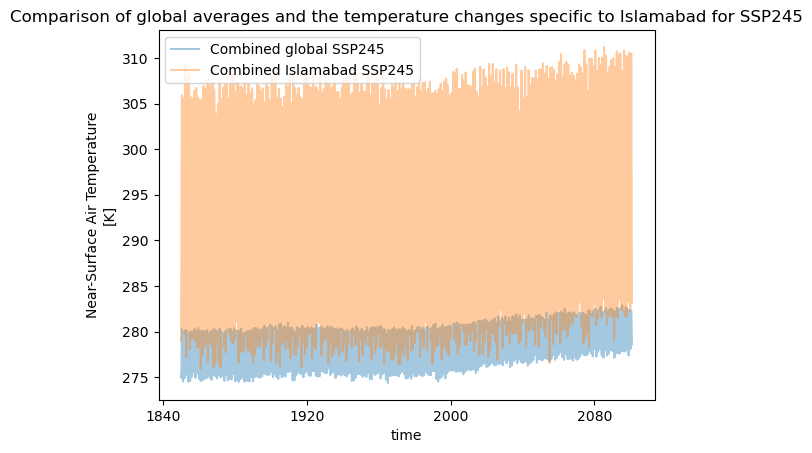

In [30]:
combined_dset_ssp245['tas'].sel(time=slice('18500116', '21001216')).mean(axis=(1,2)).plot(alpha=0.4, label='Combined global SSP245')
combined_isl_ssp245.plot(alpha=0.4, label='Combined Islamabad SSP245')
plt.legend()
ax = plt.gca()
ax.set_title('Comparison of global averages and the temperature changes specific to Islamabad for SSP245')
plt.savefig(os.path.join(path, 'air_temp_time_series_comparison_ssp245'), dpi=300)
plt.show()

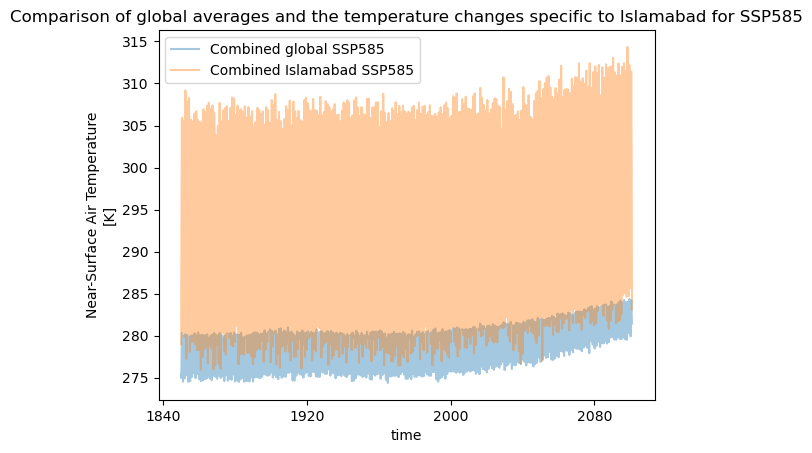

In [31]:
combined_dset_ssp585['tas'].sel(time=slice('18500116', '21001216')).mean(axis=(1,2)).plot(alpha=0.4, label='Combined global SSP585')
combined_isl_ssp585.plot(alpha=0.4, label='Combined Islamabad SSP585')
plt.legend()
ax = plt.gca()
ax.set_title('Comparison of global averages and the temperature changes specific to Islamabad for SSP585')
plt.savefig(os.path.join(path, 'air_temp_time_series_comparison_ssp585'), dpi=300)
plt.show()